# Sobol indices

In [1]:
import openturns as ot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Ishigami Framework

In [2]:
from shapley.tests import Ishigami
ishigami = Ishigami()
dim = ishigami.dim
model = ishigami

### Monte-Carlo estimation using true model

In [3]:
%%time
from shapley import SobolIndices

ot.RandomGenerator.SetSeed(0)
np.random.seed(0)

n_sample = 500

sobol = SobolIndices(model.input_distribution)

# Generate the samples
sobol.build_sample(model=model, n_sample=n_sample)

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 4.04 ms


In [4]:
%%time
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)

n_boot = 500
estimator = 'sobolmara'

# Indice estimation
sobol_results = sobol.compute_indices(n_boot=n_boot, estimator=estimator)

CPU times: user 16 ms, sys: 20 ms, total: 36 ms
Wall time: 37.8 ms


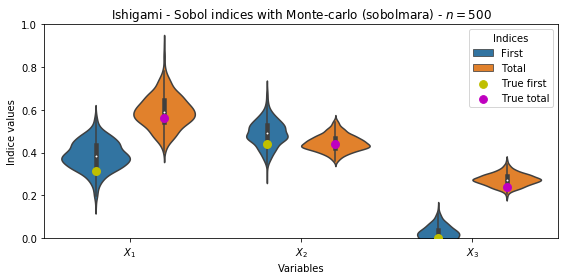

In [5]:
from shapley.plots import plot_sensitivity_results
ylim = [0., 1.]

fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_results, ax=ax)
ax.set_title("%s - Sobol indices with Monte-carlo (%s) - $n=%d$" % (model.name, estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()

### Monte-Carlo estimation using a Kriging model

In [6]:
from shapley.kriging import KrigingModel
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)

model_budget = 300
sampling = 'lhs'
library = 'sklearn'
kernel = 'matern'
basis = 'linear'

model_gp = KrigingModel(model=model, input_distribution=model.input_distribution)
model_gp.generate_sample(n_sample=model_budget, sampling=sampling)
model_gp.build(library=library, kernel=kernel, basis_type=basis)

In [7]:
# The score of the meta_model
q2_score_cv_gp = model_gp.compute_score_q2_cv(n_sample=10000)
print('Q2-score by cross-validation:', q2_score_cv_gp)

Q2-score by cross-validation: 0.925211680392


In [8]:
%%time
n_realization = 500
sobol.build_sample(model=model_gp, n_sample=n_sample, n_realization=n_realization)

CPU times: user 48.8 s, sys: 1.1 s, total: 49.9 s
Wall time: 6.68 s


In [9]:
%%time
# Indice estimation
sobol_gp_results = sobol.compute_indices(n_boot=n_boot, estimator=estimator)

CPU times: user 8.6 s, sys: 8.03 s, total: 16.6 s
Wall time: 15.8 s


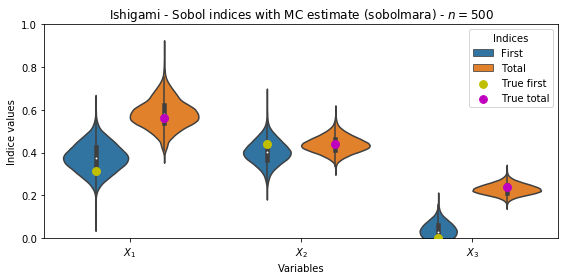

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_gp_results, ax=ax)
ax.set_title("%s - Sobol indices with MC estimate (%s) - $n=%d$" % (model.name, estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()

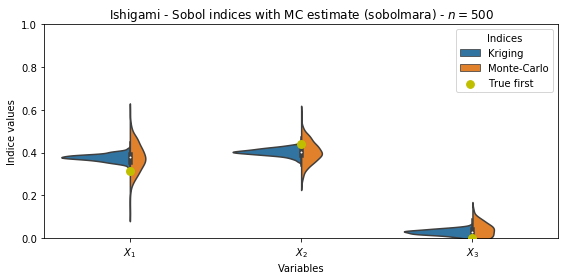

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_gp_results, ax=ax, indice='first')
ax.set_title("%s - Sobol indices with MC estimate (%s) - $n=%d$" % (model.name, estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()

### Monte-Carlo estimation using a Random Forest model

In [12]:
from shapley.forest import RandomForestModel
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)

model_rf = RandomForestModel(model=model, input_distribution=model.input_distribution)
model_rf.generate_sample(n_sample=model_budget, sampling=sampling)
model_rf.build(n_realization, method='random-forest')

In [13]:
# The score of the meta_model
q2_score_cv_rf = model_rf.compute_score_q2_cv(n_sample=10000)
print('Q2-score by cross-validation:', q2_score_cv_rf)

Q2-score by cross-validation: 0.863282477106


In [14]:
%%time
sobol.build_sample(model_rf, n_sample=n_sample, n_realization=n_realization)

CPU times: user 472 ms, sys: 8 ms, total: 480 ms
Wall time: 479 ms


In [15]:
%%time
# Indice estimation
sobol_rf_results = sobol.compute_indices(n_boot=n_boot, estimator=estimator)

CPU times: user 7.5 s, sys: 8.56 s, total: 16.1 s
Wall time: 16.2 s


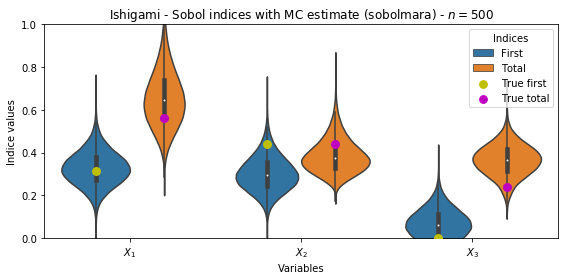

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_rf_results, ax=ax)
ax.set_title("%s - Sobol indices with MC estimate (%s) - $n=%d$" % (model.name, estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()

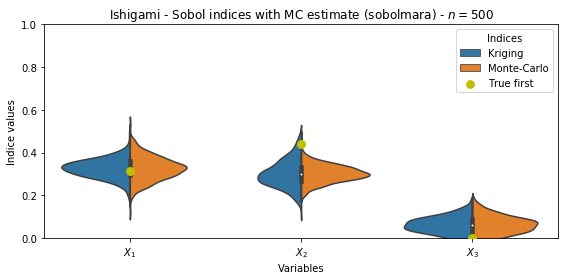

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_rf_results, ax=ax, indice='first')
ax.set_title("%s - Sobol indices with MC estimate (%s) - $n=%d$" % (model.name, estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()